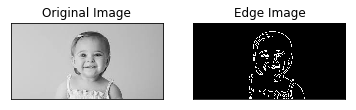

In [40]:
import numpy as np
from matplotlib import pyplot as plt
import cv2

img = cv2.imread('12.jpg',0)
edges = cv2.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

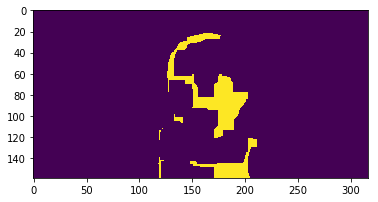

In [41]:
kernel = np.ones((10,10), np.uint8) 

img_dilation = cv2.dilate(edges, kernel, iterations=1) 

kernel = np.ones((15,15), np.uint8) 

img_dilation = cv2.erode(img_dilation, kernel, iterations=1) 


plt.imshow(img_dilation)

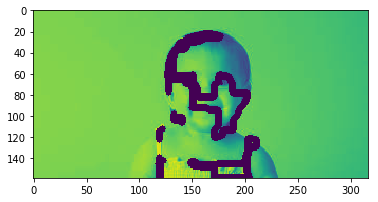

In [42]:
contours, _ = cv2.findContours(img_dilation,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
img = cv2.drawContours(img.copy(), contours, -1, (0,255,0), 5)
plt.imshow(img)

In [43]:
rect = []
for i in range(len(contours)):
    if len(contours[i])>30:
        maxx=-1
        maxy=-1
        minx=100000
        miny=100000
        for j in range(len(contours[i])):
            if contours[i][j][0][0] < minx:
                minx = contours[i][j][0][0]
            if contours[i][j][0][0] > maxx:
                maxx = contours[i][j][0][0]
            if contours[i][j][0][1]<miny:
                miny=contours[i][j][0][1]
            if contours[i][j][0][1]>maxy:
                maxy=contours[i][j][0][1]
       
        rect.append([minx,maxx,miny,maxy])
        

In [44]:
for i in range(len(rect)):
    img = cv2.rectangle(img, (rect[i][0],rect[i][2]), (rect[i][1],rect[i][3]), (255, 0, 0), 2)


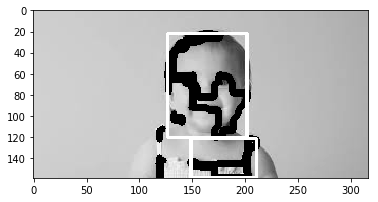

In [45]:
plt.imshow(img,cmap = 'gray')